🌍 Week 2 – Climate Risk & Disaster Management
AICTE Cycle 3 (2025)
📌 Objective

In Week 2, we extend our work from Week 1 by performing:

Exploratory Data Analysis (EDA): deeper insights into disaster patterns and distributions.

Data Transformation: preparing categorical and numerical features for ML models.

Feature Selection: identifying the most relevant features for prediction tasks.

In [2]:
# ==============================
# 📌 Week 2: EDA, Transformation & Feature Selection
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 📌 Load Cleaned Dataset (from Week 1)
# ==============================
DATA_PATH = "/content/drive/MyDrive/1900_2021_DISASTERS_cleaned.csv"
df = pd.read_csv(DATA_PATH)

print("✅ Cleaned dataset loaded with shape:", df.shape)
df.head()


✅ Cleaned dataset loaded with shape: (16126, 45)


,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,CW-2012-000006,Natural,Climatological,Drought,Drought,Tornado,Cholera,Cabo Verde,...,10000.0,3000.0,5965.0,172500.0,60000.0,3.221647,1,925,13306,Administrative unit not available (Adm1).
1,1900,9001,CW-2012-000006,Natural,Climatological,Drought,Drought,Tornado,Cholera,India,...,10000.0,3000.0,5965.0,172500.0,60000.0,3.221647,1,925,13306,Administrative unit not available (Adm1).
2,1902,12,CW-2012-000006,Natural,Geophysical,Earthquake,Ground movement,Tornado,Cholera,Guatemala,...,10000.0,3000.0,5965.0,172500.0,25000.0,3.350513,1,925,13306,Administrative unit not available (Adm1).
3,1902,3,CW-2012-000006,Natural,Geophysical,Volcanic activity,Ash fall,Tornado,Santa Maria,Guatemala,...,10000.0,3000.0,5965.0,172500.0,60000.0,3.350513,1,925,13306,Administrative unit not available (Adm1).
4,1902,10,CW-2012-000006,Natural,Geophysical,Volcanic activity,Ash fall,Tornado,Santa Maria,Guatemala,...,10000.0,3000.0,5965.0,172500.0,60000.0,3.350513,1,925,13306,Administrative unit not available (Adm1).


In [3]:
# Save cleaned dataset
df.to_csv("1900_2021_DISASTERS_cleaned.csv", index=False)

# Then reload
df_cleaned = pd.read_csv("1900_2021_DISASTERS_cleaned.csv")
print("✅ Reloaded cleaned dataset:", df_cleaned.shape)


✅ Reloaded cleaned dataset: (16126, 45)


🔍 Step 1 – Exploratory Data Analysis (EDA)

We begin with a deeper look at the dataset:

Distribution of disaster types

Disaster trends across decades

Top affected countries

Correlation between numerical features

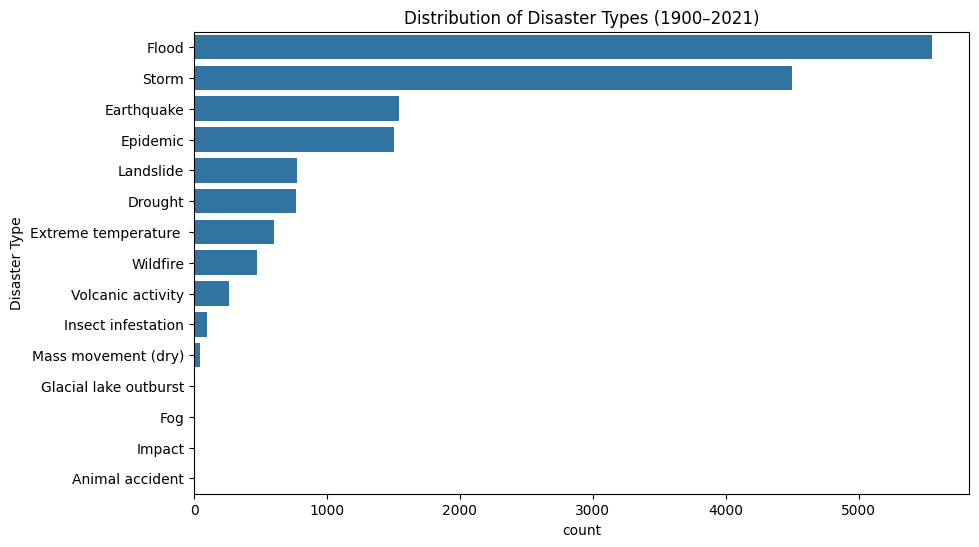

In [4]:
# Disaster count by type
plt.figure(figsize=(10,6))
sns.countplot(y="Disaster Type", data=df, order=df["Disaster Type"].value_counts().index)
plt.title("Distribution of Disaster Types (1900–2021)")
plt.show()

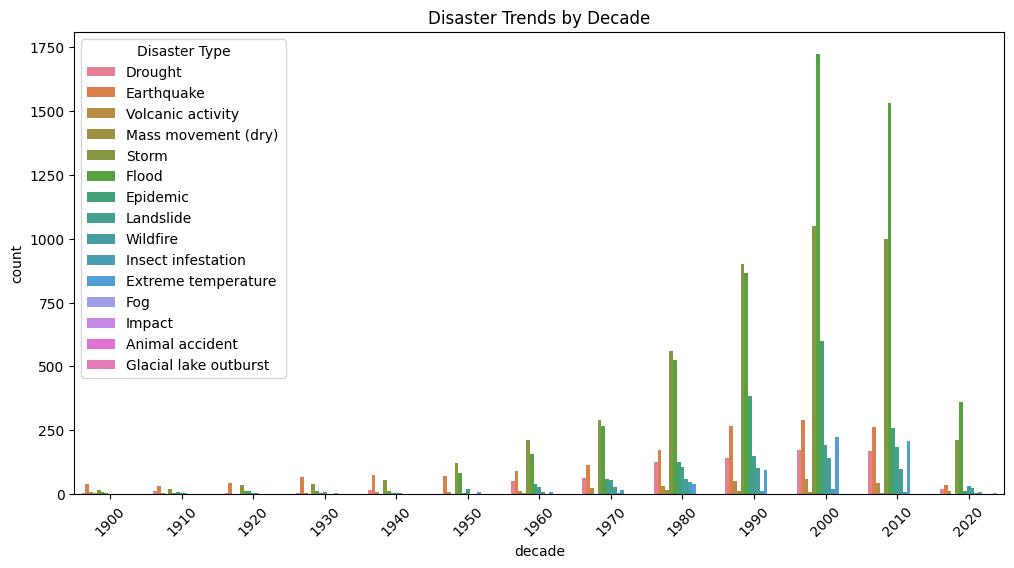

In [5]:
# Trend of disasters per decade
df["decade"] = (df["Year"]//10)*10
plt.figure(figsize=(12,6))
sns.countplot(x="decade", hue="Disaster Type", data=df)
plt.title("Disaster Trends by Decade")
plt.xticks(rotation=45)
plt.show()

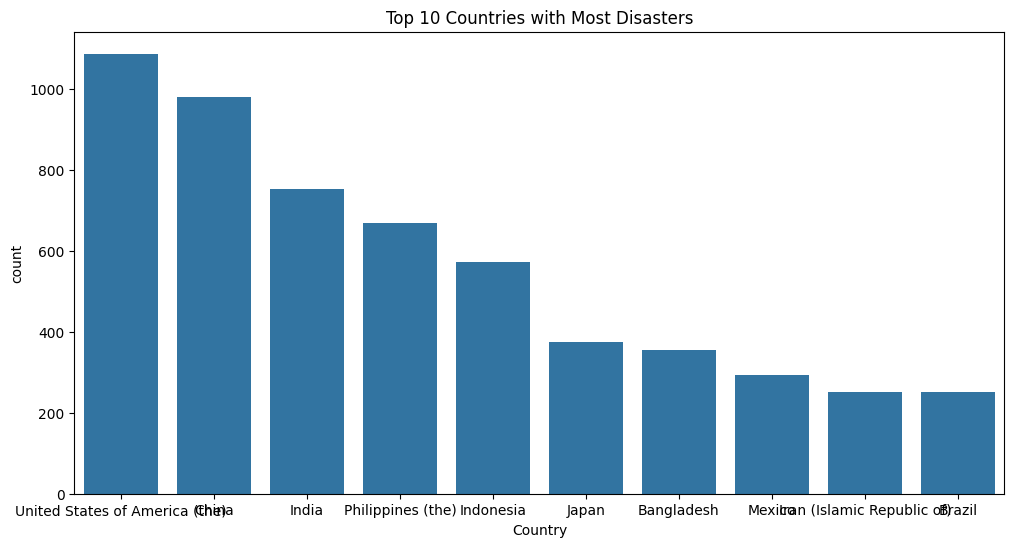

In [7]:
# Top 10 countries affected
plt.figure(figsize=(12,6))
top_countries = df["Country"].value_counts().head(10).index
sns.countplot(x="Country", data=df[df["Country"].isin(top_countries)], order=top_countries)
plt.title("Top 10 Countries with Most Disasters")
plt.show()

🛠 Step 2 – Data Transformation

Before modeling, we prepare the dataset:

Convert column names to lowercase and replace spaces with underscores.

Encode categorical variables (Label Encoding).

Standardize numerical features for fair comparison.

In [8]:
# Encode categorical features
cat_cols = df.select_dtypes(include="object").columns
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le
    print(f"🔑 Encoded: {col}")

# Scale numerical features
num_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("✅ Numerical features scaled.")


🔑 Encoded: Glide
🔑 Encoded: Disaster Group
🔑 Encoded: Disaster Subgroup
🔑 Encoded: Disaster Type
🔑 Encoded: Disaster Subtype
🔑 Encoded: Disaster Subsubtype
🔑 Encoded: Event Name
🔑 Encoded: Country
🔑 Encoded: ISO
🔑 Encoded: Region
🔑 Encoded: Continent
🔑 Encoded: Location
🔑 Encoded: Origin
🔑 Encoded: Associated Dis
🔑 Encoded: Associated Dis2
🔑 Encoded: OFDA Response
🔑 Encoded: Appeal
🔑 Encoded: Declaration
🔑 Encoded: Dis Mag Scale
🔑 Encoded: Latitude
🔑 Encoded: Longitude
🔑 Encoded: Local Time
🔑 Encoded: River Basin
🔑 Encoded: Adm Level
🔑 Encoded: Admin1 Code
🔑 Encoded: Admin2 Code
🔑 Encoded: Geo Locations
✅ Numerical features scaled.


🎯 Step 3 – Feature Selection

Not all features are equally important.

We apply statistical tests (ANOVA F-test, Mutual Information) to rank features.

Retain only the top-k features that are most useful for disaster type prediction.

In [9]:
# Assume 'disaster_type' as target variable (for classification)
X = df.drop("Disaster Type", axis=1)
y = df["Disaster Type"]

# Select top 10 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("✅ Selected Features:\n", selected_features)


✅ Selected Features:
 Index(['Seq', 'Disaster Subgroup', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Continent', 'Longitude', 'Local Time', 'Adm Level',
       'Geo Locations'],
      dtype='object')


📂 Step 4 – Save Processed Dataset

The transformed and feature-selected dataset is saved as week2_features.csv for Week 3 model development.

In [10]:
df[selected_features.to_list() + ["Disaster Type"]].to_csv(
    "week2_features.csv", index=False
)
print("📂 Week 2 processed dataset saved.")


📂 Week 2 processed dataset saved.


✅ Summary (Week 2)

Performed advanced EDA on disasters dataset.

Transformed categorical and numerical features for ML readiness.

Selected the most relevant features for predictive modeling.

Saved the processed dataset for Week 3 (Predictive Modeling).